In [63]:
import os
import cv2
import time
import numpy as np
from cv2 import rotate
import tensorflow as tf
from sklearn import metrics
from sklearn.metrics import accuracy_score
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

In [64]:
train_datagen = ImageDataGenerator( rescale = 1./255,               #Tien xu ly du lieu
                                    horizontal_flip = True,
                                    vertical_flip = True,
                                    height_shift_range=0.1,
                                    width_shift_range=0.1,
                                    rotation_range = 90,
                                    brightness_range=[0.5,1.5])                    
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Code AI/Train',
                                                 target_size = (64, 64),
                                                 batch_size = 100,
                                                 class_mode = 'categorical')
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Code AI/Test',
                                            target_size = (64, 64),
                                            batch_size = 100,
                                            class_mode = 'categorical')

classes = ['Mơ Khô','Phúc Bồn Tử','Sung Khô','Táo Tàu','Thảo Quả']
print("Image Processing.......Compleated")

Found 500 images belonging to 5 classes.
Found 600 images belonging to 5 classes.
Image Processing.......Compleated


In [97]:
#Build Neural Network (Mo hinh chuan thu nghiem)
model = tf.keras.models.Sequential()
print("Building Neural Network.....")

# Layer ConV 1    
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3], name='ConV_1'))
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, name='MaxPool_1'))

# Layer ConV 2
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu', name='ConV_2'))
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, name='MaxPool_2'))

# Layer ConV 3
model.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation='relu', name='ConV_3'))
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, name='MaxPool_3'))

# Flatten
model.add(tf.keras.layers.Flatten(name='Flatten'))

# Fully Connected
model.add(tf.keras.layers.Dense(units=1024, activation='relu', name='Layer1'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(units=512, activation='relu', name='Layer2'))
model.add(tf.keras.layers.Dropout(0.5))

# Softmax
model.add(tf.keras.layers.Dense(units=5, activation='softmax', name='Output'))

#Function Optimizer Adam
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.optimizer.learning_rate = 0.005    # Defaults to 0.001

#In cau truc network ra man hinh
print('Detail of network: ')
print(model.summary())

# Training Model
print("Training model")
history=model.fit(x = training_set, validation_data = test_set, epochs = 20)
model.save("model.h5")

Building Neural Network.....
Detail of network: 
Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 ConV_1 (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 MaxPool_1 (MaxPooling2D)    (None, 31, 31, 32)        0         
                                                                 
 ConV_2 (Conv2D)             (None, 29, 29, 64)        18496     
                                                                 
 MaxPool_2 (MaxPooling2D)    (None, 14, 14, 64)        0         
                                                                 
 ConV_3 (Conv2D)             (None, 12, 12, 128)       73856     
                                                                 
 MaxPool_3 (MaxPooling2D)    (None, 6, 6, 128)         0         
                                                                 
 Fla

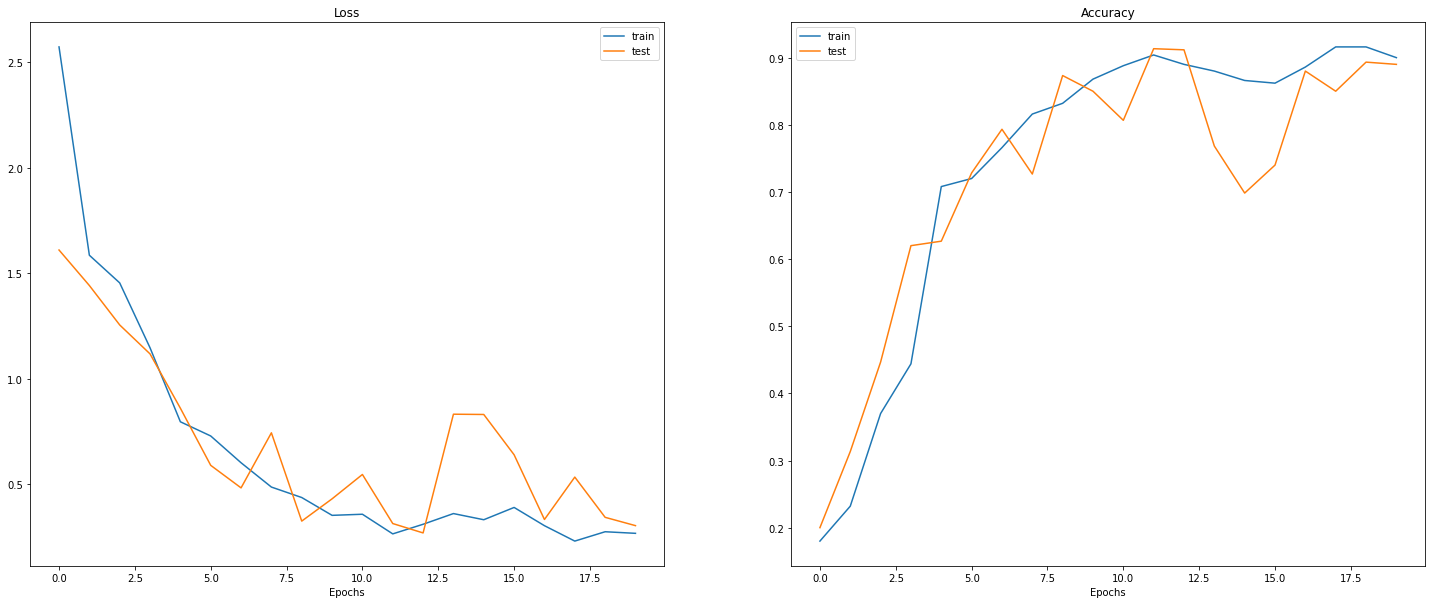

In [99]:
# VẼ ĐỒ THỊ LOSS VÀ ACCURACY
import matplotlib.pyplot as pyplot

# plot loss
pyplot.figure(figsize=(25,10))
pyplot.subplot(121)
pyplot.title('Loss')
pyplot.xlabel('Epochs')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
# plot accuracy
pyplot.subplot(122)
pyplot.title('Accuracy')
pyplot.xlabel('Epochs')
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

4/4 [==============================] - 0s 54ms/step
Accuracy: 0.890000
Precision: 0.911000
Recall: 0.893529
F1 score: 0.889767
ROC AUC: 0.995891

Confusion matrix: X-Dự Đoán 	 Y-Nhãn Thật
1-Mơ Khô	2-Phúc Bồn Tử		3-Sung Khô 	 4-Táo Tàu	5-Thảo Quả


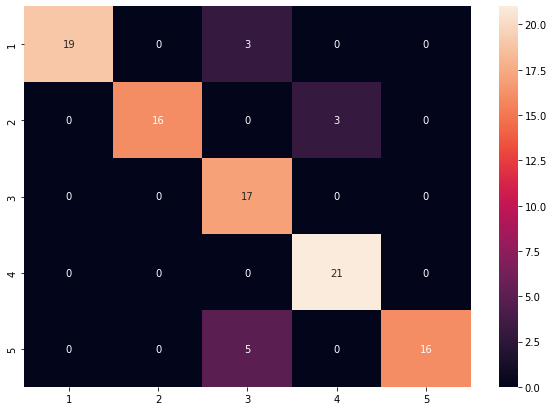

In [106]:
#Tinh toan CONFUSION MATIRIX, PRECISION, RECALL VÀ F1-SCORE
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

#Chia du lieu train, test
X_test, y_test = next(test_set)

#Tra ve ket qua du doan
y_hat = model.predict(X_test)
y_pred = np.argmax(y_hat, axis=1)
y_test_label =  np.argmax(y_test, axis=1)

# Tính accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test_label, y_pred)
print('Accuracy: %f' % accuracy)
# Tính precision tp / (tp + fp)
precision = precision_score(y_test_label, y_pred, average='macro')
print('Precision: %f' % precision)
# Tính recall: tp / (tp + fn)
recall = recall_score(y_test_label, y_pred, average='macro')
print('Recall: %f' % recall)
# Tính f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test_label, y_pred, average='macro')
print('F1 score: %f' % f1)
# Tính Area under ROC
auc = roc_auc_score(y_test, y_hat, multi_class='ovr')
print('ROC AUC: %f' % auc)
# Tính confusion matrix
matrix = confusion_matrix(y_test_label, y_pred)
#print(matrix)

# Ma tran nham lan (Confusion matrix)
import pandas as pd
import seaborn as sn
df_cm = pd.DataFrame(matrix, index = [i for i in "12345"],
                     columns = [i for i in "12345"])
pyplot.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)
print("\nConfusion matrix: X-Dự Đoán \t Y-Nhãn Thật\n1-Mơ Khô\t2-Phúc Bồn Tử\t\t3-Sung Khô \t 4-Táo Tàu\t5-Thảo Quả")

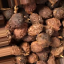

1/1 [==============================] - 0s 88ms/step
Thảo Quả


In [114]:
# Kiem tra ket qua
from matplotlib import figure
import numpy as np
from keras_preprocessing import image
import cv2
from tensorflow.keras.models import load_model
from google.colab.patches import cv2_imshow

new_model = load_model('model.h5')

#path = r'/content/drive/MyDrive/Code AI/Test/Mơ Khô/_13_3842302.png'
#path = r'/content/drive/MyDrive/Code AI/Test/Phúc Bồn Tử/_24_1373810.png'
#path = r'/content/drive/MyDrive/Code AI/Test/Sung Khô/_45_3315180.png'
#path = r'/content/drive/MyDrive/Code AI/Test/Táo Tàu/_72_9082598.png'
path = r'/content/drive/MyDrive/Code AI/Test/Thảo Quả/_58_1437312.png'

img = cv2.imread(path)
cv2_imshow(img)
test_image = image.load_img(path, target_size=(64,64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
result = new_model.predict(test_image)
result1 = result[0]
for y in range(5):
    if result1[y] == 1.:
        break
prediction = classes[y] 
print(prediction)
cv2.waitKey()
cv2.destroyAllWindows()